<a href="https://colab.research.google.com/github/Priyankasiddi89/Bookshop-Management/blob/main/orglens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

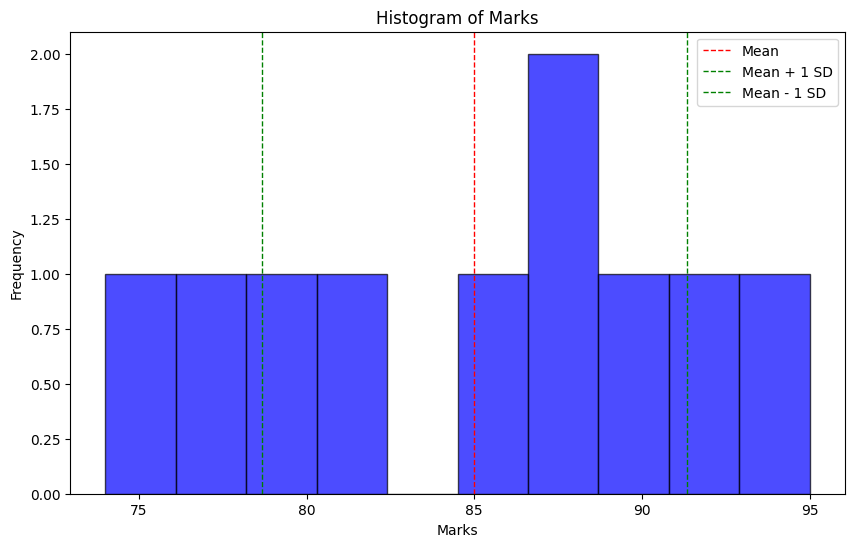

In [1]:
import csv
import matplotlib.pyplot as plt
def read_csv(file_path):
    names = []
    marks = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            names.append(row[0])
            marks.append(float(row[1]))
    return names, marks
def calculate_mean(data):
    return sum(data) / len(data)
def calculate_variance(data, mean):
    return sum((x - mean) ** 2 for x in data) / len(data)
def calculate_std_dev(variance):
    return variance ** 0.5
def write_results(file_path, mean, variance, std_dev):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Statistic', 'Value'])
        writer.writerow(['Mean', mean])
        writer.writerow(['Variance', variance])
        writer.writerow(['Standard Deviation', std_dev])
def plot_data(marks, mean, std_dev):
    plt.figure(figsize=(10, 6))
    plt.hist(marks, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='Mean + 1 SD')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label='Mean - 1 SD')
    plt.xlabel('Marks')
    plt.ylabel('Frequency')
    plt.title('Histogram of Marks')
    plt.legend()
    plt.show()
csv_file_path = '/content/input1.csv'
result_file_path = '/content/result1.csv'
names, marks = read_csv(csv_file_path)
mean = calculate_mean(marks)
variance = calculate_variance(marks, mean)
std_dev = calculate_std_dev(variance)
write_results(result_file_path, mean, variance, std_dev)
plot_data(marks, mean, std_dev)


# **2**

In [2]:
def set_msb_two_to_one(number):
    bit_length = number.bit_length()
    mask = (1 << bit_length) | (1 << (bit_length - 1))
    result = number | mask
    return result, bin(result)

number = int(input("Enter a number: "))

decimal_result, binary_result = set_msb_two_to_one(number)

print(f"Original Number: {number} (Decimal) / {bin(number)} (Binary)")
print(f"Modified Number: {decimal_result} (Decimal) / {binary_result} (Binary)")


Enter a number: 5
Original Number: 5 (Decimal) / 0b101 (Binary)
Modified Number: 13 (Decimal) / 0b1101 (Binary)


# **3**

In [3]:
def calculate_notes(balance):
    denominations = [2000, 500, 200, 100, 50, 20, 10, 5, 2, 1]
    note_count = {}
    for note in denominations:
        if balance >= note:
            note_count[note] = balance // note
            balance %= note
        else:
            note_count[note] = 0
    return note_count

balance = int(input("Enter value:"))
note_count = calculate_notes(balance)
print(note_count)


Enter value:5467
{2000: 2, 500: 2, 200: 2, 100: 0, 50: 1, 20: 0, 10: 1, 5: 1, 2: 1, 1: 0}


# **4**

In [5]:
def caesar_cipher(text, shift):
    result = ""
    for char in text:
        if char.isalpha():
            start = ord('a') if char.islower() else ord('A')
            result += chr(start + (ord(char) - start + shift) % 26)
        else:
            result += char
    return result

def xor_with_salt(text, salt):
    result = []
    salt_length = len(salt)
    for i, char in enumerate(text):
        result.append(chr(ord(char) ^ ord(salt[i % salt_length])))
    return ''.join(result)

filename = "input4.txt"
with open(filename, 'r') as file:
    original_text = file.read().strip()

shift =int(input("Enter shift value:"))
caesar_encrypted_text = caesar_cipher(original_text, shift)
#print(f"Encrypted Caesar String: {caesar_encrypted_text}")

salt =input("salt string:")
final_encrypted_text = xor_with_salt(caesar_encrypted_text, salt)
output_filename = f"{filename}_enc.txt"
with open(output_filename, 'w') as file:
    file.write(final_encrypted_text)
print(f"Original text{original_text}")
print(f"Encrypted Caesar String: {caesar_encrypted_text}")
print(f"After XORing Encrypted Caesar String: {final_encrypted_text}")
print(f"Encrypted file written to {output_filename}")


Enter shift value:2
salt string:abc
Original textOrgLens is a leader in Organizational Network Analysis, studying key relationships and analyzing the network behavior of diverse groups.
Encrypted Caesar String: QtiNgpu ku c ngcfgt kp Qticpkbcvkqpcn Pgvyqtm Cpcnauku, uvwfakpi mga tgncvkqpujkru cpf cpcnabkpi vjg pgvyqtm dgjcxkqt qh fkxgtug itqwru.
After XORing Encrypted Caesar String: 0
	B C 

A	BA
AACO
Encrypted file written to input4.txt_enc.txt


# **5**

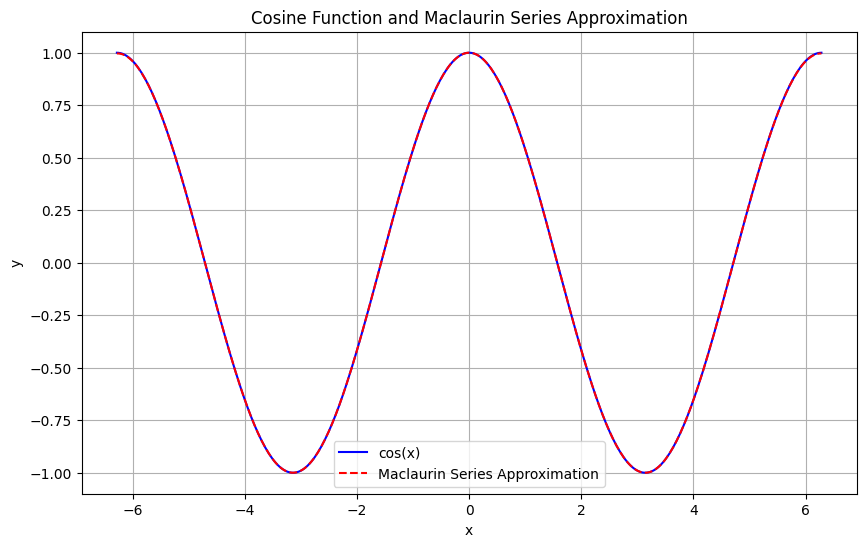

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mymath import maclaurin_cos
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 400)
cos_approx = [maclaurin_cos(x, terms=10) for x in x_values]
cos_true = np.cos(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, cos_true, label='cos(x)', color='blue')
plt.plot(x_values, cos_approx, '--', label='Maclaurin Series Approximation', color='red')
plt.title('Cosine Function and Maclaurin Series Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# **6**

In [9]:
import json

def compare_json(json1, json2):
    differences = {}

    def compare_dicts(d1, d2, path=""):
        keys = set(d1.keys()).union(set(d2.keys()))
        for key in keys:
            new_path = f"{path}.{key}" if path else key
            if key in d1 and key in d2:
                if isinstance(d1[key], dict) and isinstance(d2[key], dict):
                    compare_dicts(d1[key], d2[key], new_path)
                elif d1[key] != d2[key]:
                    differences[new_path] = {"first_json": d1[key], "second_json": d2[key]}
            elif key in d1:
                differences[new_path] = {"first_json": d1[key], "second_json": "Key not present in second JSON"}
            else:
                differences[new_path] = {"first_json": "Key not present in first JSON", "second_json": d2[key]}

    compare_dicts(json1, json2)
    return differences

json_str1 = '''
{
    "x": 10.1,
    "y": 20,
    "name": "Anu",
    "dob": "2010-10-10"
}
'''

json_str2 = '''
{
    "x": 10,
    "y": 20,
    "name": "Ani",
    "dob": "2010-10-11",
    "z": 100
}
'''

json1 = json.loads(json_str1)
json2 = json.loads(json_str2)

result = compare_json(json1, json2)

result_json = json.dumps(result, indent=4)
print(result_json)


{
    "dob": {
        "first_json": "2010-10-10",
        "second_json": "2010-10-11"
    },
    "x": {
        "first_json": 10.1,
        "second_json": 10
    },
    "z": {
        "first_json": "Key not present in first JSON",
        "second_json": 100
    },
    "name": {
        "first_json": "Anu",
        "second_json": "Ani"
    }
}
